In [4]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [6]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [7]:
wine = load_wine()

In [8]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [10]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [11]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
lda = LinearDiscriminantAnalysis()

In [13]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2])

In [15]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [12]:
result

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,2,2
5,0,0
6,1,1
7,2,2
8,0,0
9,2,2


In [13]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

In [15]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 3.62474456e+00, -1.56725346e-01,  6.42866337e+00,
        -9.57352870e-01, -1.91326365e-02, -1.65997932e+00,
         5.32059449e+00,  1.85659811e+00, -1.63927834e+00,
        -1.09239823e+00,  1.78232000e+00,  3.48958822e+00,
         1.34471913e-02],
       [-2.27799907e+00, -1.08684330e+00, -6.45740197e+00,
         2.39374043e-01,  1.59537579e-02, -4.93308854e-02,
         1.50794246e+00,  1.06633314e+01,  9.55194546e-01,
        -7.58851759e-01,  1.14254448e+00,  3.48204050e-01,
        -6.12330638e-03],
       [-9.26337925e-01,  2.15143698e+00,  2.66283513e+00,
         8.89975181e-01, -2.11025597e-03,  2.37034221e+00,
        -1.00018399e+01, -2.15468815e+01,  5.52567435e-01,
         2.85375227e+00, -4.48584736e+00, -5.41842227e+00,
        -7.58274852e-03]])

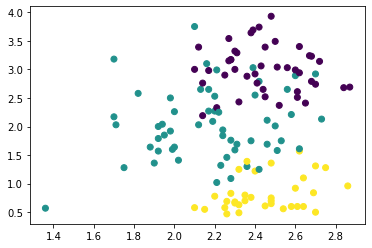

In [16]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [17]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

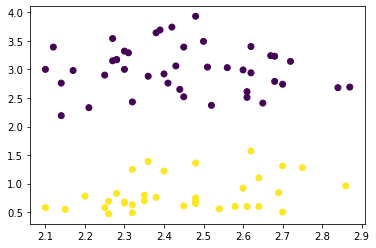

In [18]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [19]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [20]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.44255814, 3.00232558],
       [2.44705882, 0.82264706]])

C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


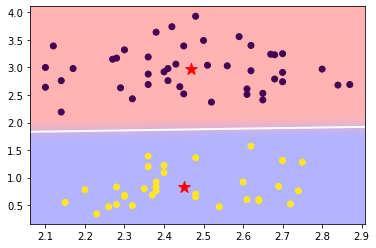

In [21]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [22]:
# второй признак в 17 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  1.71845536, -16.21148437]])

In [23]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [24]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [27]:
lr.predict(small_test)

array([0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2])

In [28]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [29]:
lr.coef_

array([[ 0.07511345, -3.10961573]])

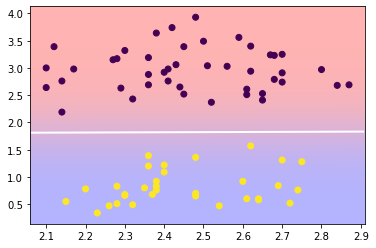

In [30]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [31]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [32]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [33]:
X

array([[-1.40070521, -5.23211359],
       [ 1.15090057, -9.39688992],
       [-1.22806749,  4.90884851],
       [ 3.0621187 ,  4.60077286],
       [ 4.31409688, -0.28696701],
       [ 0.2042538 , -6.32270445],
       [ 1.08944175, -2.5586636 ],
       [-1.53823483, -1.66832465],
       [ 2.13105368,  0.11953976],
       [ 2.03536527, -0.41838831],
       [-1.20734594,  1.52047914],
       [ 3.87765725, -1.78147875],
       [-3.16320928, -0.80593863],
       [ 1.21599124, -9.86354577],
       [ 4.35001817,  6.53587276],
       [-0.65839558, -5.2344832 ],
       [ 8.43698316, -2.79817507],
       [ 3.70771218,  1.91112435],
       [ 2.50187146,  6.4628849 ],
       [-0.69547823, -3.33622283],
       [ 5.07501345, -1.12947257],
       [ 5.65549536, -1.05957712],
       [-1.52467161, -0.1435009 ],
       [ 1.92883035,  1.49757597],
       [ 3.10275512, -2.95771668],
       [ 2.85014284, -4.17331797],
       [ 0.29578892,  2.0160596 ],
       [ 4.85266988, -2.0475547 ],
       [ 3.82575965,

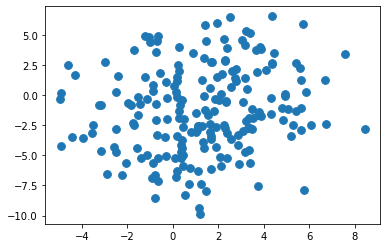

In [34]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [35]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [37]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

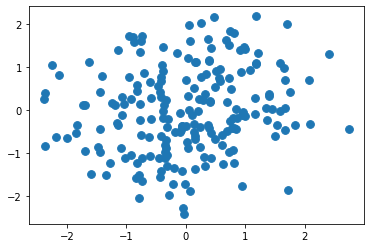

In [38]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [39]:
from sklearn.cluster import KMeans

In [40]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

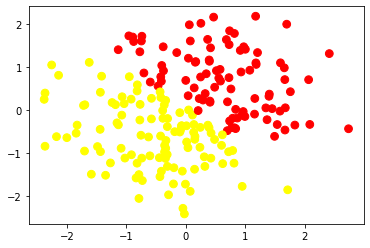

In [41]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [42]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

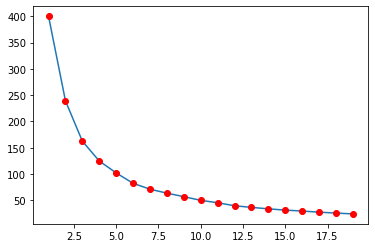

In [43]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [44]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

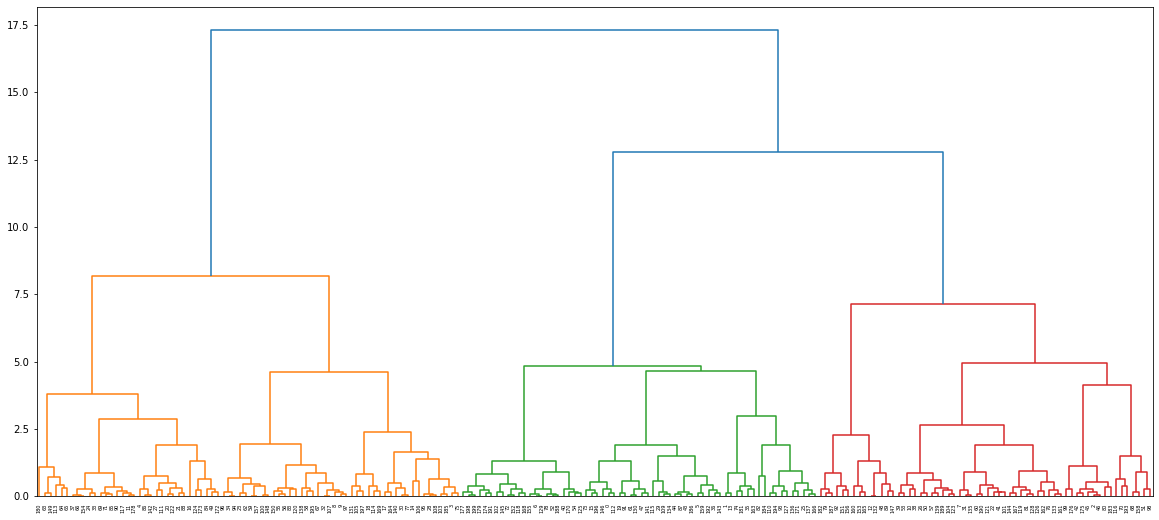

In [49]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [46]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [47]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

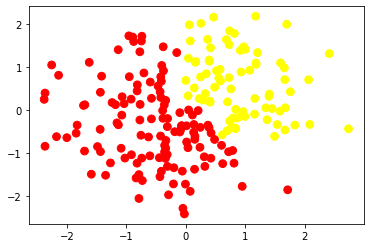

In [48]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)